In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
# 解决绘图出现中文乱码的问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 关于绘图三大套件的选择

## 如何选择？
* A.pandas内置方法（df.plot）——如果数据源为dataframe尤其是时间序列的df，则pandas内置方法是最便捷的选项，能实现目标的情况下优先选择该方法
* B.seaborn——如果数据分析目标有清晰的统计学意义，或是复杂的多因素分析与数据探索，在A不满足的情况下优先考虑B
* C.matplotlib——作为A和B的底层，具备最强的自定义能力，但独立使用时略显繁琐，建议作为A和B的补充项进行自定义，不要出于炫技从头绘制图形

## 相关资源
* [Chapter 9: Plotting and Visualization](https://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch09.ipynb) From[《Python for Data Analysis》](https://github.com/wesm/pydata-book)by Wes McKinney, published by O'Reilly Media
* [https://python-graph-gallery.com/](https://python-graph-gallery.com/)：一个从功能场景角度整理的图库，方便快速查找

## 载入案例数据
* df1：android market数据集(From:kaggle)
* df2：美股科技龙头股价数据(使用datareader api在线读取)
* df3：口袋妖怪的数值设定数据

In [2]:
df1  = pd.read_csv('datas/googleplaystore.csv')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
tech_list = ['AAPL','GOOG','FB','AMZN','MSFT']
df2 = web.DataReader(tech_list,'yahoo',start='2015-1-1')['Adj Close']

In [4]:
df2.head()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2014-12-31,102.503265,310.350006,78.019997,523.521423,42.137520
2015-01-02,101.528191,308.519989,78.449997,521.937744,42.418739
2015-01-05,98.667984,302.190002,77.190002,511.057617,42.028660
2015-01-06,98.677261,295.290009,76.150002,499.212799,41.411785
2015-01-07,100.060936,298.420013,76.150002,498.357513,41.937946


In [5]:
df2_daily = df2/df2.shift(1)-1

In [6]:
df3 = pd.read_csv('datas/Pokemon.csv',index_col=0)
df3.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Pandas内置方法
* 优点：为pandas量身定做，使用非常简单，对于自动处理Dataframe多列数据有极大的优势——无须为每一列指定绘图，在生成stack类型（堆叠图）时更是无比便捷
* 缺点：虽然是基于matplotlib.pyplot，但是部分图形自定义能力不支持，例如对X日期轴的自定义格式处理
* 官方文档：
    * [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
    * [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)
* 小结：对df数据格式来说在绝大多数情况下都是够用的，如果对图形的自定义能力要求不高，首选推荐

## 基础篇
df.plot(kind=*)
* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or ‘density’ for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

基本等效于各种独立plt.kind()，但在某些情况下的对图形属性自定义需要用回plt的模式

### 折线图

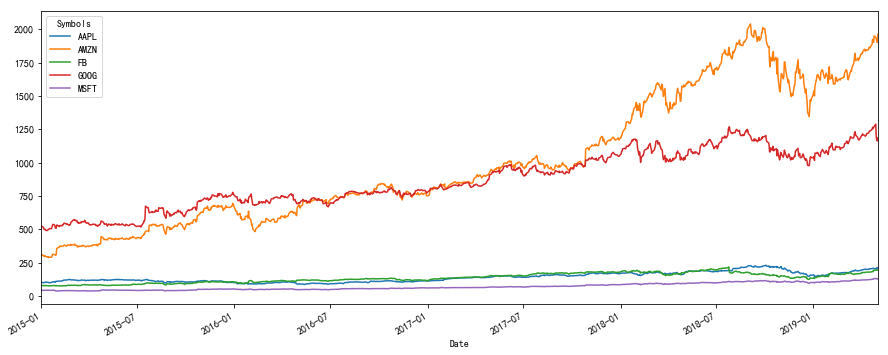

In [7]:
_ = df2.plot(figsize=(15,6))

### 条形图

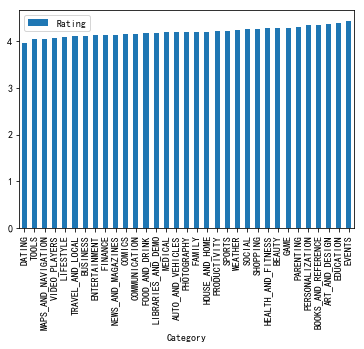

In [8]:
df1[df1['Category']!='1.9'].groupby('Category').mean().sort_values(by='Rating').plot(kind='bar')

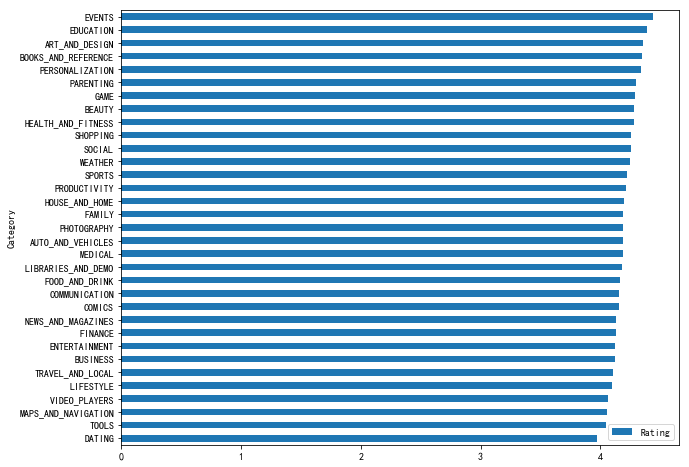

In [9]:
df1[df1['Category']!='1.9'].groupby('Category').mean().sort_values(by='Rating').plot(kind='barh',figsize=(10,8))

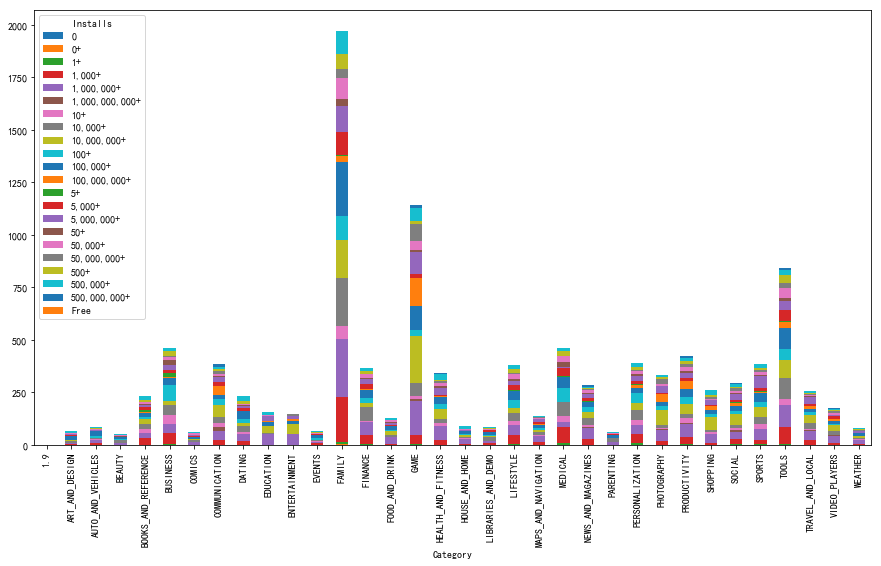

In [10]:
df1.groupby(['Category','Installs']).count()['App'].unstack().plot(kind='bar',stacked=True,figsize=(15,8))

### 饼图

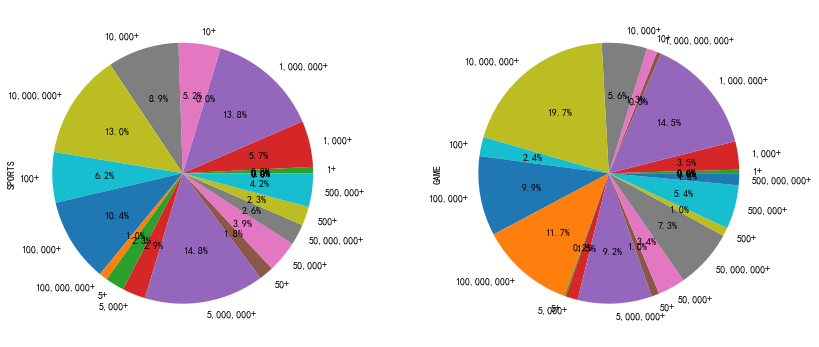

In [11]:
_= df1.groupby(['Installs','Category']).count()['App'].unstack()[['SPORTS','GAME']].plot(kind='pie',subplots=True,legend=False,figsize=(14,6),autopct='%1.1f%%')

In [12]:
df1[df1['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### 散点图

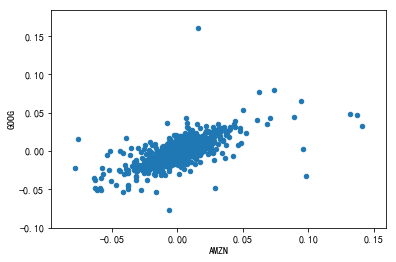

In [13]:
_ = df2_daily.plot(x='AMZN',y='GOOG',kind='scatter')

### 直方图

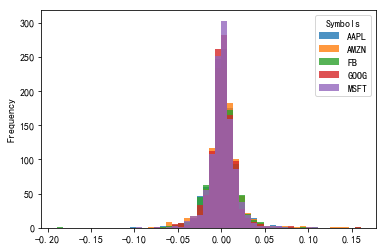

In [14]:
_ = df2_daily.plot(kind='hist',bins=50,alpha=0.8)

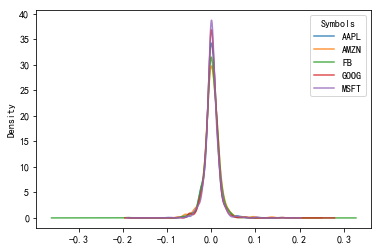

In [15]:
_ = df2_daily.plot(kind='kde',alpha=0.8)

### boxplot

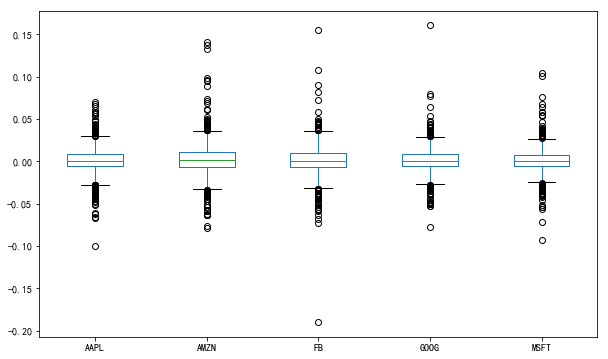

In [16]:
_ = df2_daily.plot(kind='box',layout=(1,4),figsize=(10,6))

## 技巧篇

### [使用双坐标轴](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-on-a-secondary-y-axis)

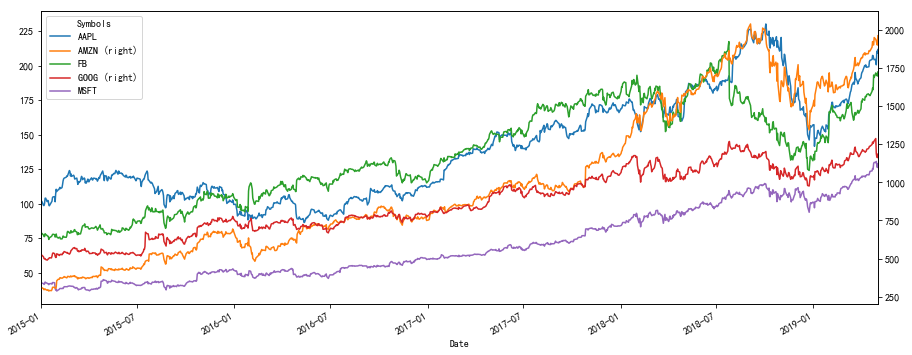

In [17]:
_ = df2.plot(figsize=(15,6),secondary_y=['AMZN','GOOG'])

### 输出子图

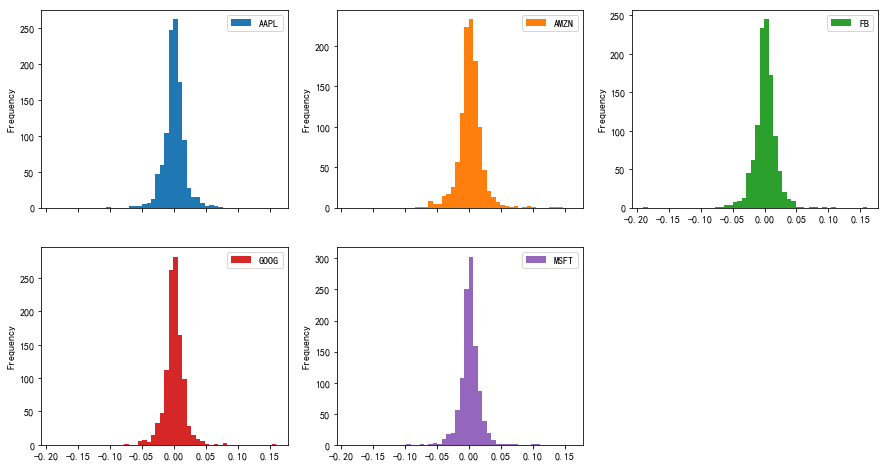

In [18]:
_ = df2_daily.plot(kind='hist',bins=50,subplots=True,layout=(2,3),figsize=(15,8))

### 自定义设置
* 标题：title
* 尺寸：figsize
* 视觉：style,color,colormap,colorbar
* 方向：vert
* 紧凑日期显示：x_compat
* 子图共享坐标轴：sharex,sharey
* 显示table数据：table
* 对数坐标轴：logx,logy
* 坐标轴数据：xticks,ysticks
* 坐标轴范围：xlim,ylim


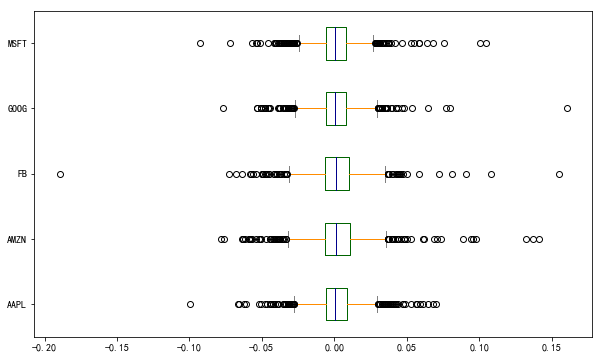

In [19]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
_ = df2_daily.plot(kind='box',layout=(1,4),figsize=(10,6),color=color,vert=False)

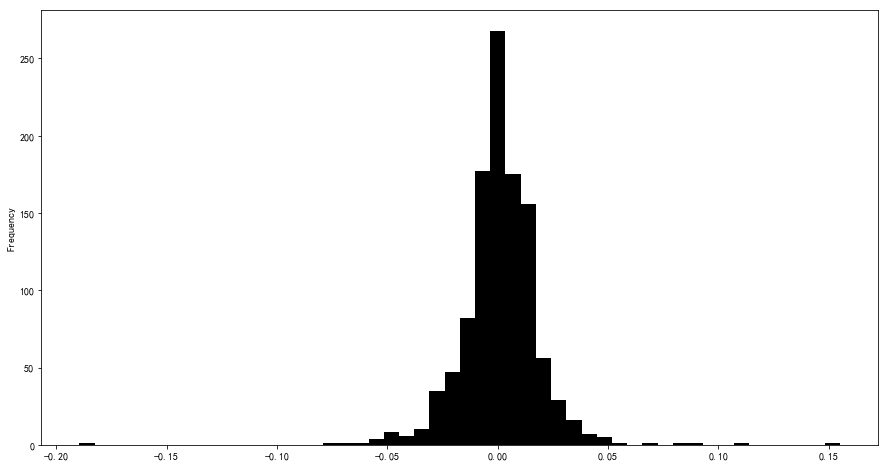

In [20]:
_ = df2_daily['FB'].plot(kind='hist',bins=50,color='k',layout=(2,3),figsize=(15,8))

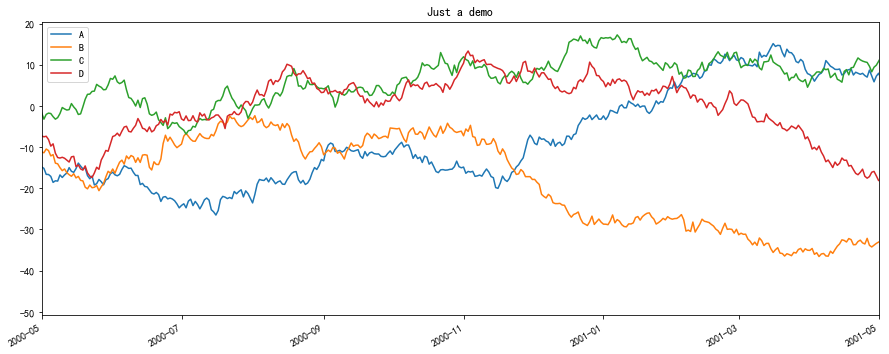

In [21]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4),index=ts.index, columns=list('ABCD'))
_ = df.cumsum().plot(figsize=(15,6),x_compat=True,title='Just a demo',xlim=('2000-5','2001-5'))

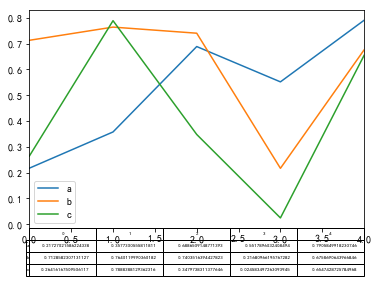

In [22]:
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
df.plot(table=True)

* 格式化X日期轴：某些操作会导致绘图时日期值显示过长（如group或resample）只能对日期索引列重定义后再绘图
* ax.set()：同一对标签、标题等进行定义
* ax.legend()：定义图例的位置
* plt.xticks(),plt.yticks()：定义坐标轴格式

[Text(0, 0.5, '收益率'), Text(0.5, 0, '年度'), Text(0.5, 1.0, '美股科技龙头年度收益率对比 ')]

<Figure size 432x288 with 0 Axes>

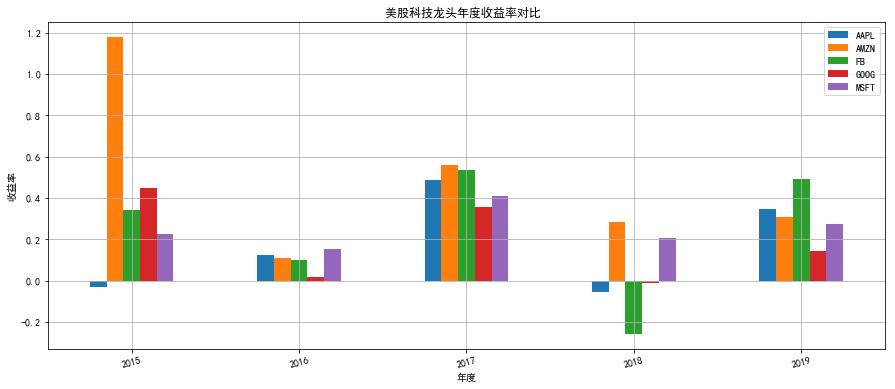

In [23]:
#import matplotlib.dates as mdates
df2_yearly = df2.resample('BY').last()
df2_yearly.index = df2_yearly.index.year #对日期索引列重定义，月度和日期也是类似处理方式
plt.figure()
ax = df2_yearly.pct_change().dropna().plot(kind='bar',figsize=(15,6),grid=True)
plt.xticks(rotation=15) #旋转X轴标签
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.legend(loc='best')
ax.set(xlabel='年度', ylabel='收益率',title = "美股科技龙头年度收益率对比 ")

## 复杂图形

### scatter_matrix

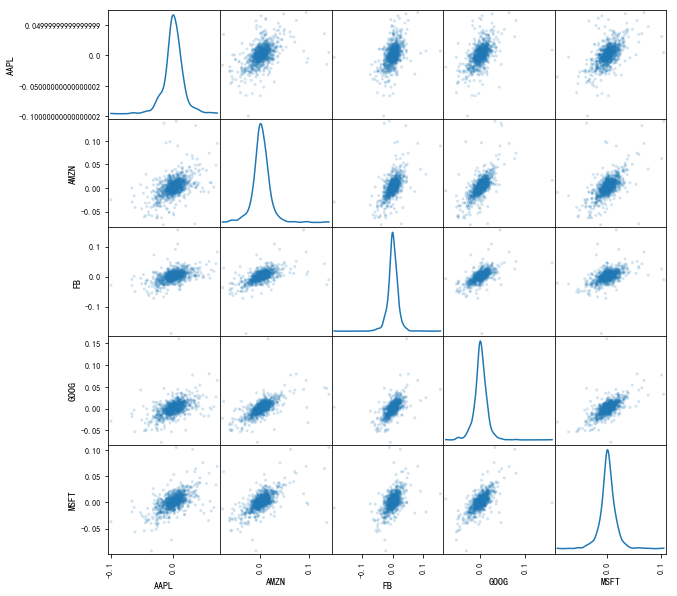

In [24]:
from pandas.plotting import scatter_matrix
_=scatter_matrix(df2_daily,alpha=0.2, figsize=(10, 10), diagonal='kde')

# matplotlib
* [官方文档与教程](https://matplotlib.org/index.html)

## 理解基本概念
最重要的是理解这张图，才能正确进行自定义设置：

![](https://matplotlib.org/_images/anatomy.png)

In [25]:
x = np.linspace(0,10,10)
y = np.arange(0,30,3)
z = x ** 2
x,y,z

(array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]),
 array([  0.        ,   1.2345679 ,   4.9382716 ,  11.11111111,
         19.75308642,  30.86419753,  44.44444444,  60.49382716,
         79.01234568, 100.        ]))

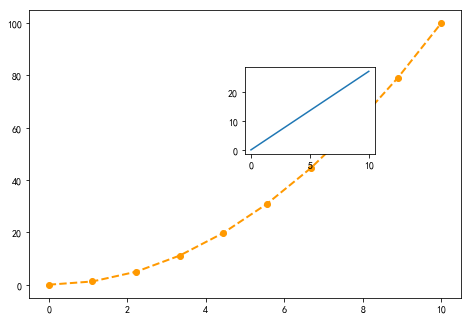

In [26]:
fig = plt.figure()#创建一个画布对象
ax = fig.add_axes([0,0,1,1])#设定绘图区域相当于画布fig的坐标，分别为起始坐标和宽高的相对比例
ax.plot(x,z,'#ff9900',lw=2,ls='--',marker='o')#色彩值可以用RGB数值或名称
ax1 = fig.add_axes([0.5,0.5,0.3,0.3])
ax1.plot(x,y)

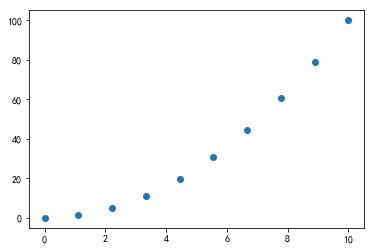

In [27]:
plt.scatter(x,z)

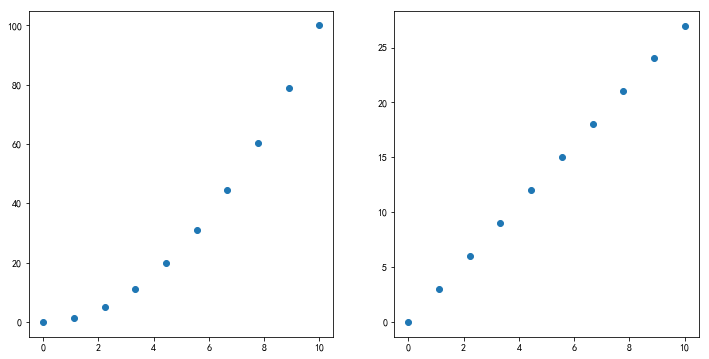

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x,z)
plt.subplot(122)
plt.scatter(x,y)

In [29]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## 自定义绘图
```
plt.plot(x,y,fmt,data)
fmt = '[color][marker][line]'

'b'    # blue markers with default shape
'ro'   # red circles
'g-'   # green solid line
'--'   # dashed line with default color
'k^:'  # black triangle_up markers connected by a dotted line
```
* [参考文档](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

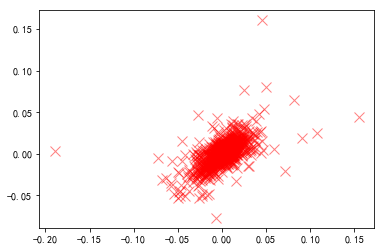

In [30]:
plt.figure()
plt.plot('FB','GOOG','rx',data=df2_daily,markersize=10,alpha=0.5)

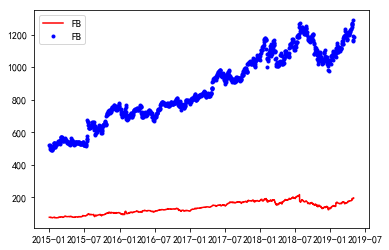

In [31]:
_ = plt.plot(df2.index,df2['FB'],'r-',df2.index,df2['GOOG'],'b.')
plt.legend()

Text(2017-1-1, 172.4600067138672, '152.4600067138672')

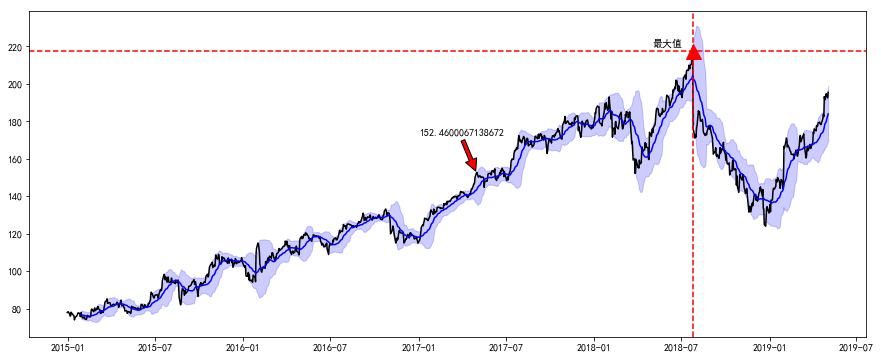

In [32]:
price = df2['FB']
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure(figsize=(15,6))
plt.title='FB data'
plt.xlabel='FB'
plt.ylabel='Adj Close'
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color='b', alpha=0.2)
plt.plot(price.idxmax(),price.max(),'r^',markersize=15)
plt.axhline(price.max(),c='r',ls='--')
plt.axvline(price.idxmax(),c='r',ls='--')
plt.text('2018-5-1',220,'最大值')
plt.annotate(price.loc['2017-5-1'], xy=('2017-5-1', price.loc['2017-5-1']), xytext=('2017-1-1', price.loc['2017-5-1']+20),arrowprops=dict(facecolor='red', shrink=0.05))

2018-12-24 00:00:00
2018-07-25 00:00:00
-0.4296092066271552


D:\Anaconda3\envs\learningPY3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


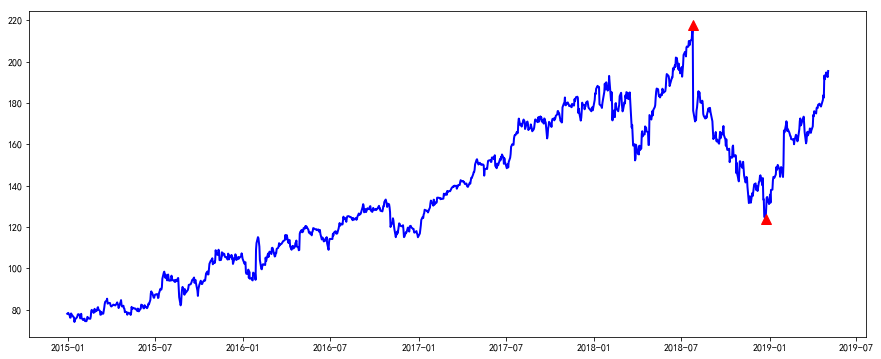

In [33]:
#data = np.random.randn(100).cumsum()
data = df2['FB']
 
index_j = np.argmax(np.maximum.accumulate(data) - data)  # 结束位置
print(index_j)
index_i = np.argmax(data[:index_j])  # 开始位置
print(index_i)
d = data[index_j] / data[index_i] - 1  # 最大回撤
print(d)
 
# 绘制图像
plt.figure(figsize=(15,6))
line = plt.plot(data)
plt.plot([index_i, index_j], [data[index_i], data[index_j]], '^', color="r", markersize=10)
plt.setp(line, color='b', linewidth=2.0)
plt.show()


# seaborn
* [官方文档与教程](https://seaborn.pydata.org/index.html)：官方教程非常值得一读，是从描述和分析数据的角度来写得，能够更好的理解在什么场景使用何种可视化方案
* [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)：适合新手快速入门
* [Seaborn Tutorial for Beginners @ kaggle](https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners)：案例丰富，涵盖主要图形
* [Data Visualization with Python and Seaborn@ medium](https://medium.com/@neuralnets/statistical-data-visualization-series-with-python-and-seaborn-for-data-science-5a73b128851d)：作者是统计学背景，因此内容不仅仅讲工具也讲思路
* [Python Seaborn Tutorial For Beginners @ datacamp](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

## seaborn简介
If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

与matplotlib相比，seaborn提供更佳的图表视觉体验，针对统计图表的优化，简单灵活的处理多变量图形，以及为矩阵和Dataframe数据类型提供更好的可视化效果，这使得Seaborn可作为数据探索性分析的最佳选择之一，借助seaborn我们能快速理解数据。不过seaborn仍然是matplotlib的有利补充而不是替代品，某些情况下我们仍需借助matplotlib

## 基础篇

### 基本工具

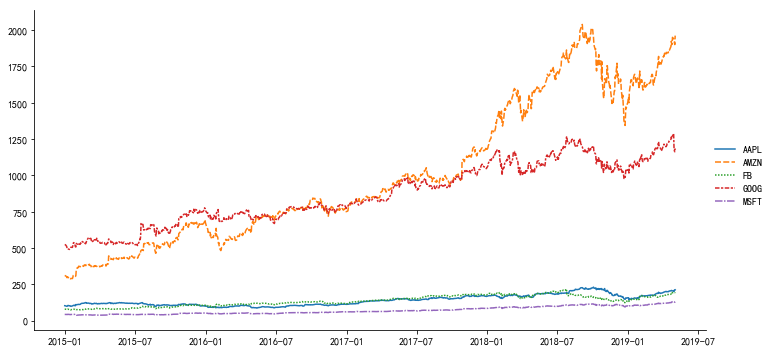

In [34]:
#sns的基本工具，相当于plt.plot，用kind指定类型为scatter或Line，同时还可添加hue、size、style分析多变量
sns.relplot(data=df2,kind='line',aspect=2)

### 条形图

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

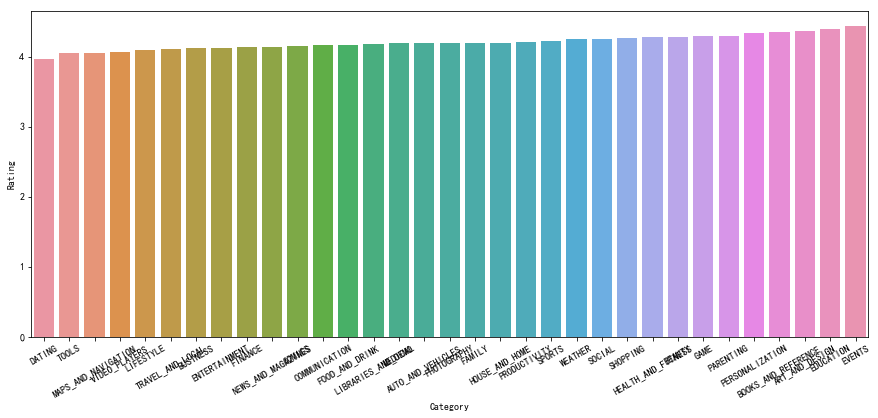

In [35]:
plt.figure(figsize=(15,6))
df = df1[df1['Category']!='1.9'].groupby('Category').mean().sort_values(by='Rating')
sns.barplot(df.index,'Rating',data=df)
plt.xticks(rotation=30)

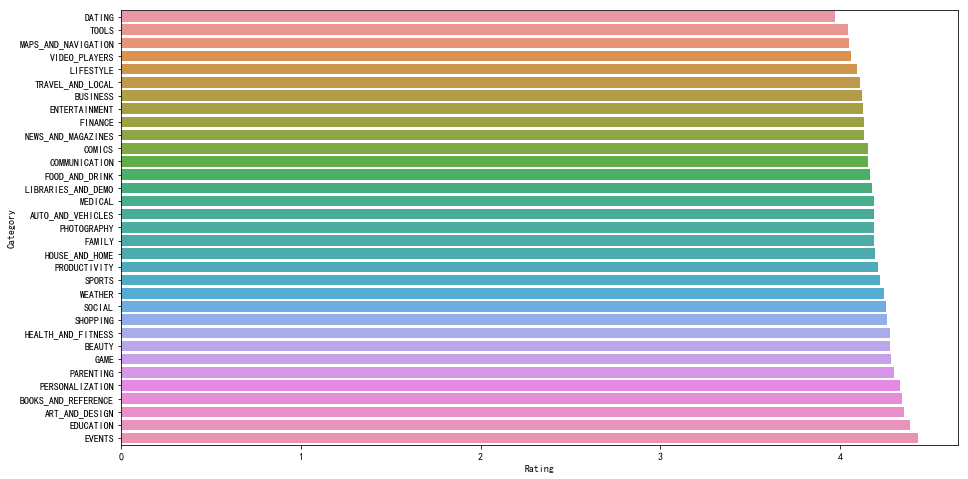

In [36]:
plt.figure(figsize=(15,8))
sns.barplot('Rating',df.index,data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

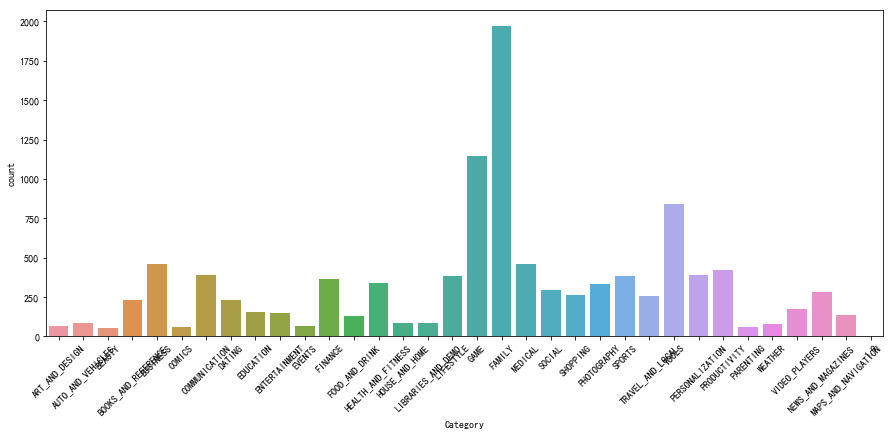

In [37]:
#countplot会自动进行count操作
plt.figure(figsize=(15,6))
sns.countplot('Category',data=df1)
plt.xticks(rotation=45)

### 散点图

(20, 141.98119480019403)

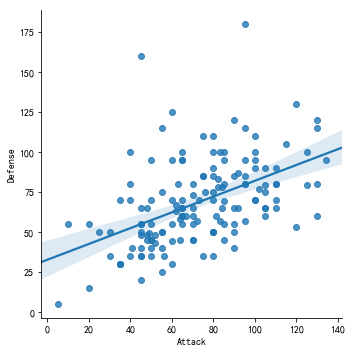

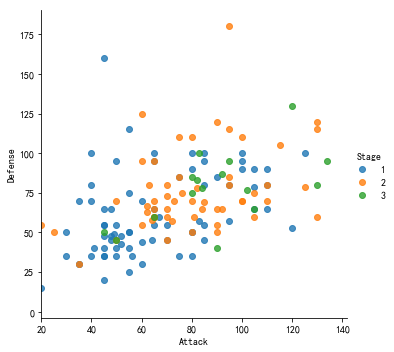

In [38]:
#指定类型绘图
sns.lmplot('Attack','Defense',data=df3)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

#对图形进一步设置，例如不显示拟合线，并添加Stage作为新的因素进行观察
sns.lmplot('Attack','Defense',data=df3,fit_reg=False,hue='Stage')

#使用matplotlib进一步设置
plt.xlim(20,None)

### 直方图

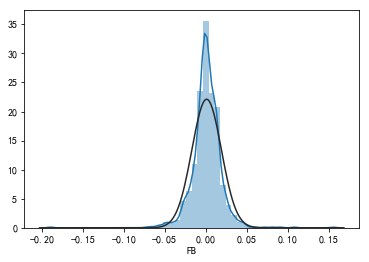

In [39]:
sns.distplot(df2_daily['FB'].dropna(),fit=stats.norm)

### 箱型图

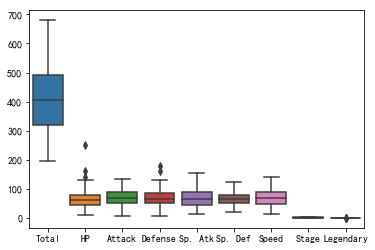

In [40]:
#直接使用df数据
ax1 = sns.boxplot(data=df3)

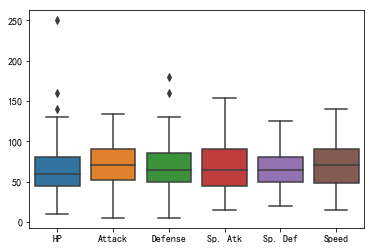

In [41]:
#使用df数据的子集，本例中我们不需要total列和最后两列
stats_df = df3.drop(['Total', 'Stage', 'Legendary'], axis=1)
ax2 = sns.boxplot(data=stats_df)

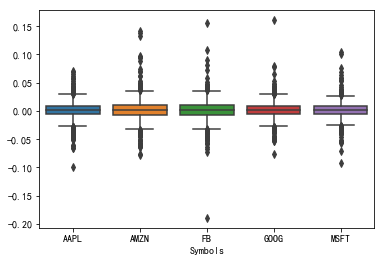

In [42]:
sns.boxplot(data=df2_daily)

## 主题与风格

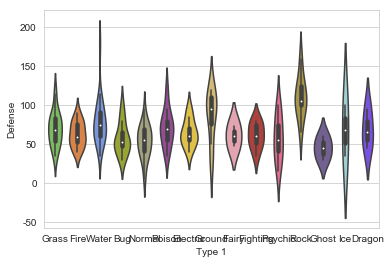

In [43]:
sns.set_style('whitegrid')
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot('Type 1','Defense',data=df3,palette=pkmn_type_colors)

## 特色图形

### swarmplot

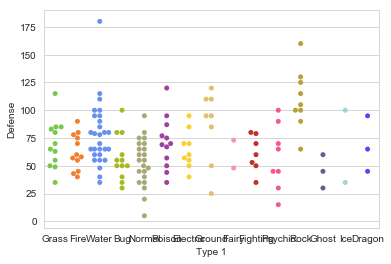

In [44]:
sns.swarmplot('Type 1','Defense',data=df3,palette=pkmn_type_colors)
sns.set(rc={'figure.figsize':(15,6)}) #设置图形属性，注意会对全体生效

### heatmap

In [45]:
df2_daily.corr()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Symbols,,,,,
AAPL,1.000000,0.485301,0.449908,0.517869,0.567433
AMZN,0.485301,1.000000,0.556860,0.653182,0.616131
FB,0.449908,0.556860,1.000000,0.601377,0.498540
GOOG,0.517869,0.653182,0.601377,1.000000,0.659819
MSFT,0.567433,0.616131,0.498540,0.659819,1.000000


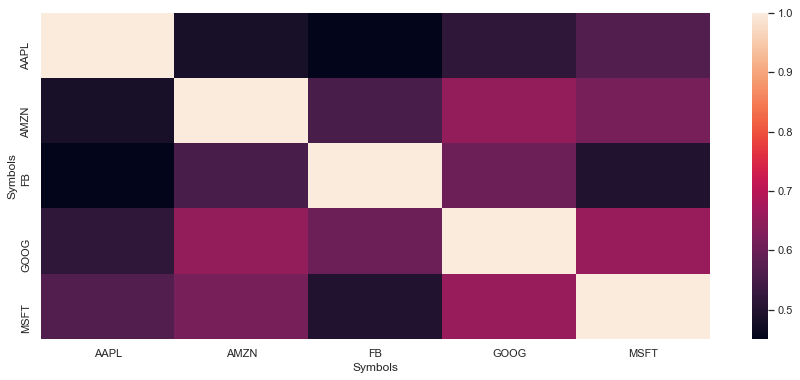

In [46]:
sns.heatmap(data=df2_daily.corr())

### jointplot

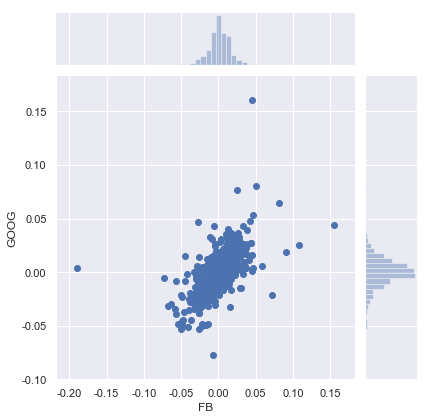

In [47]:
sns.jointplot('FB','GOOG',data=df2_daily)

### pairplot

D:\Anaconda3\envs\learningPY3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\learningPY3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


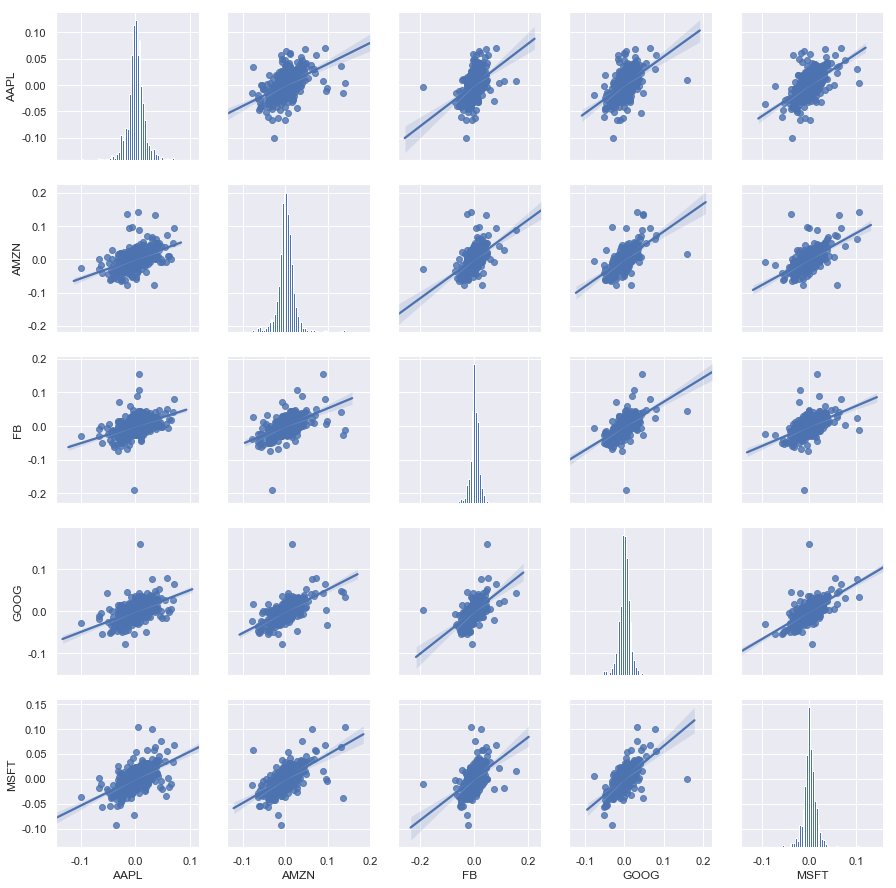

In [48]:
_= sns.pairplot(df2_daily,diag_kws=dict(bins=50),kind='reg')

### 整合多个图形

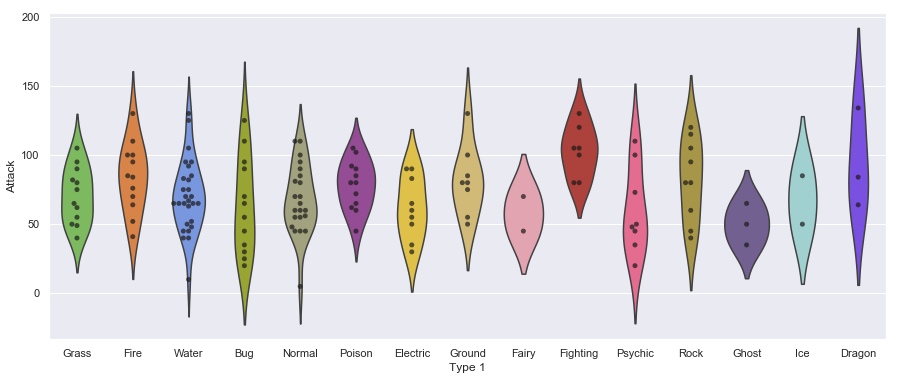

In [49]:
# Set figure size with matplotlib
plt.figure(figsize=(15,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df3, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df3, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
#plt.title('Attack by Type')

### 一个完整的案例

In [50]:
# 先使用melt将数据表转为长表
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


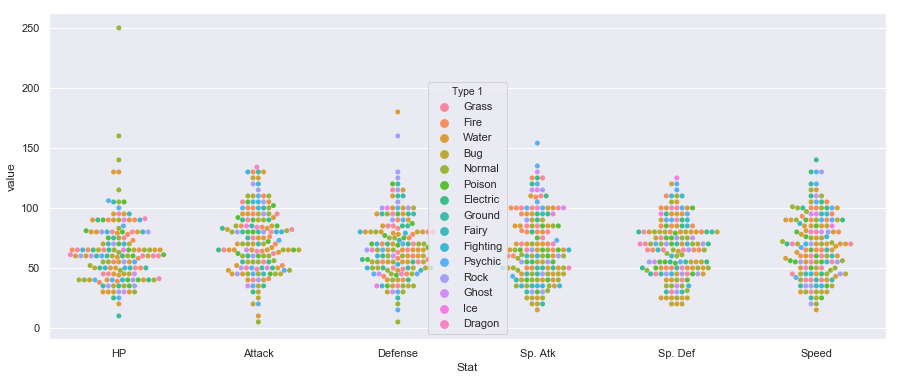

In [51]:
# 根据melted_df绘制swarm图
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

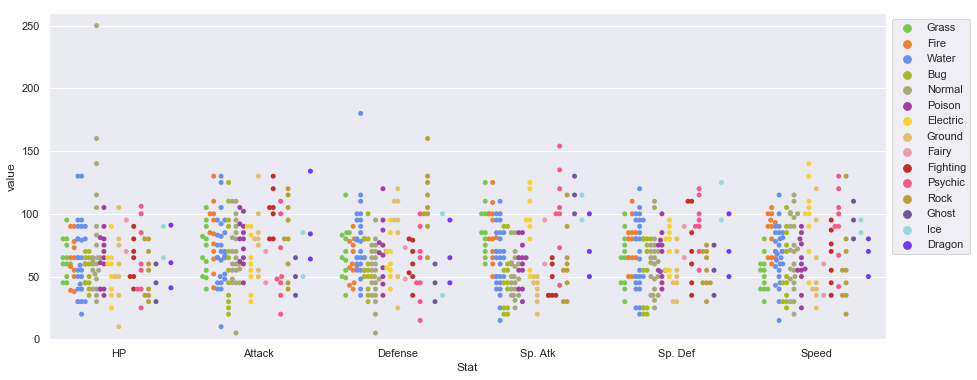

In [52]:
#优化视觉效果
# 1. Enlarge the plot
plt.figure(figsize=(15,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## 子图
catplot、relplot和lmplot可以使用col来生成子图，也可以用[Facetgrid](https://seaborn.pydata.org/tutorial/axis_grids.html)进行更强大的多轴网格子图

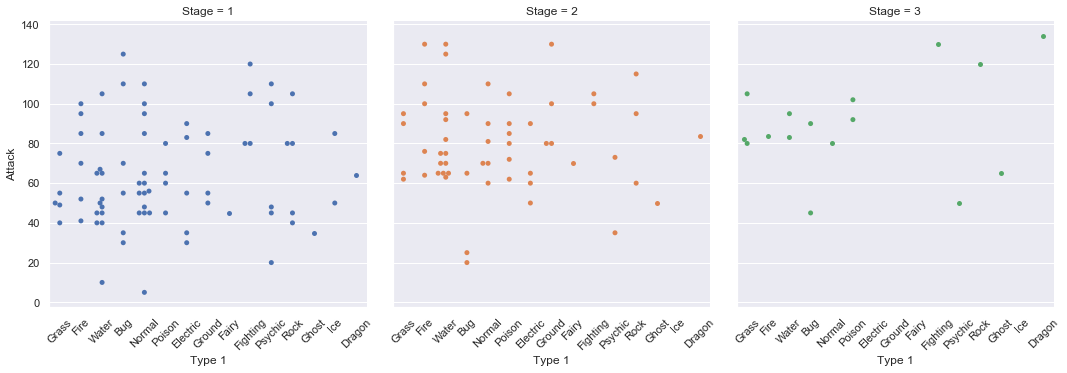

In [53]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df3, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

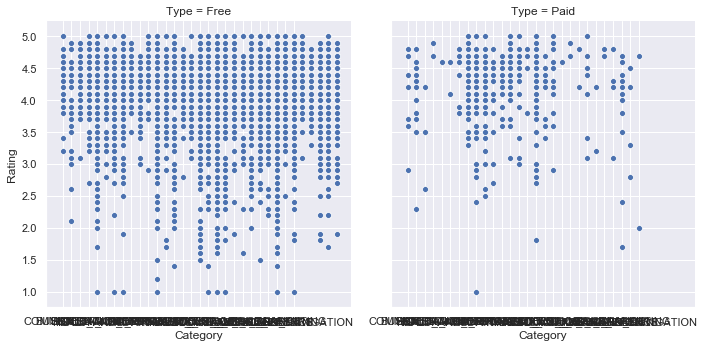

In [54]:
df1 = df1[df1['Category']!='1.9']
sns.relplot('Category','Rating',data=df1,col='Type')

## 检验正态分布

### 图形检验法

In [55]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)

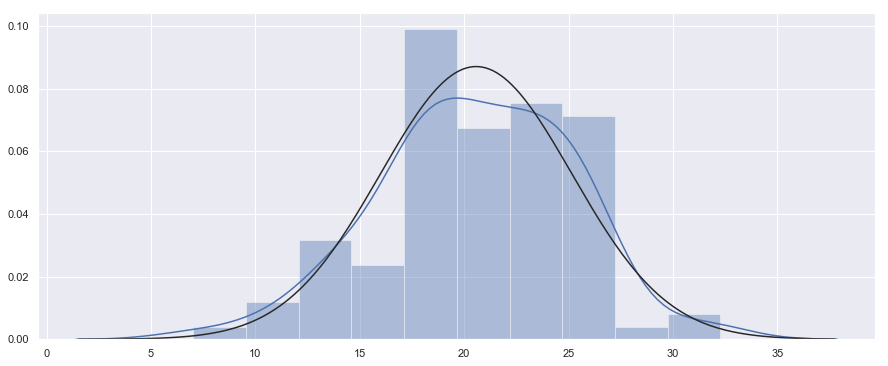

In [56]:
sns.distplot(measurements, kde=True, fit=stats.norm)

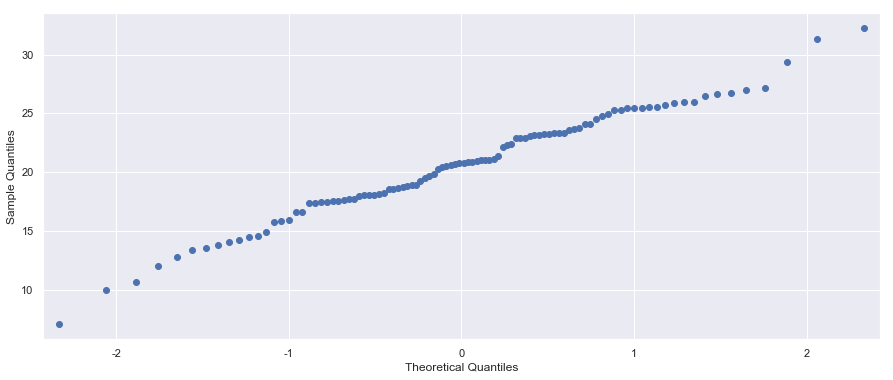

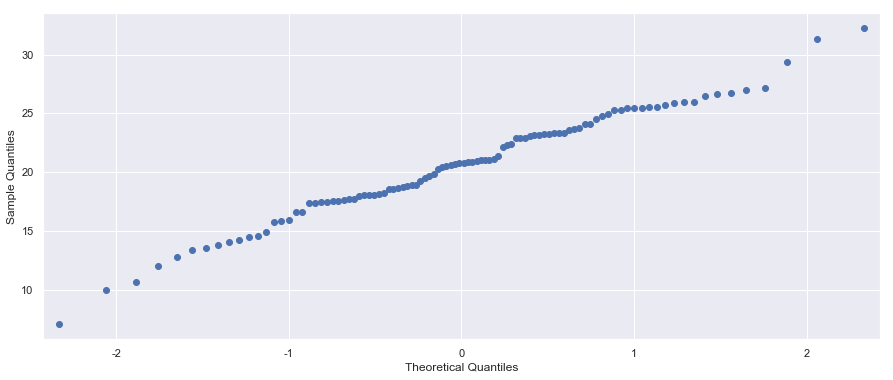

In [57]:
sm.qqplot(measurements)

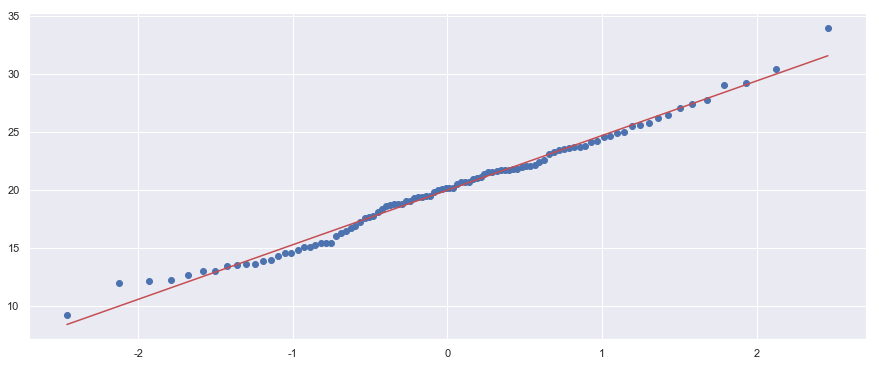

In [58]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

### 数值检验法
注意shapiro不适用于样本>5000的情况，很容易拒绝假设

In [59]:
stats.kstest(measurements,'norm'),stats.shapiro(measurements)

(KstestResult(statistic=1.0, pvalue=0.0),
 (0.9890658259391785, 0.5897527933120728))

# Bokeh

# Plotly